# AEDT connect session example

This example shows how to use the Common AEDT API to
connect to an existing  AEDT session,
create a HFSS design and create a waveguide.

## Perform required imports

Perform the required imports.

In [1]:
import os
import sys
from ansys.aedt.toolkits.common.backend.api import AEDTCommon
import ansys.aedt.core

## Initialize toolkit

Initialize the toolkit.

In [2]:
toolkit = AEDTCommon()

## Get toolkit properties

Get the toolkit properties, which contain the project information.

In [3]:
properties_from_backend = toolkit.get_properties()

In [4]:
# ## Initialize AEDT
#
# Initialize AEDT using PyAEDT and then release it.
ansys.aedt.core.settings.enable_logger = False
app = ansys.aedt.core.Desktop(version=properties_from_backend["aedt_version"],
                     non_graphical=properties_from_backend["non_graphical"])
app.release_desktop(close_projects=False, close_on_exit=False)

True

## Get AEDT sessions

Get AEDT sessions and select the first one.

In [5]:
sessions = toolkit.aedt_sessions()
first_key, first_value = next(iter(sessions.items()))
if first_value == -1:
    use_grpc = False
    selected_process = first_key
else:
    use_grpc = True
    selected_process = first_value

## Set properties

Specify the AEDT session selection.

In [6]:
new_properties = {"selected_process": selected_process, "use_grpc": use_grpc}
flag, msg = toolkit.set_properties(new_properties)

INFO - Updating internal properties.


## Initialize AEDT

Launch a new AEDT session in a thread.

In [7]:
thread_msg = toolkit.launch_thread(toolkit.launch_aedt)

## Wait for the toolkit thread to be idle

Wait for the toolkit thread to be idle and ready to accept a new task.

In [8]:
idle = toolkit.wait_to_be_idle()
if not idle:
    print("AEDT not initialized.")
    sys.exit()

## Connect design

Connect or create a new design.

In [9]:
toolkit.connect_design("HFSS")

INFO - Updating internal properties.


INFO - Toolkit is connected to AEDT design.


True

## Get toolkit properties

Get the toolkit properties, which contain the project information.

In [10]:
new_properties = toolkit.get_properties()

## Create a waveguide

Create a waveguide in the design.

C:\actions-runner\_work\pyaedt-toolkits-common\pyaedt-toolkits-common\.venv\Lib\site-packages\pyvista\jupyter\notebook.py:36: UserWarning: Failed to use notebook backend: 

Please install `ipywidgets`.

Falling back to a static output.
  warnings.warn(


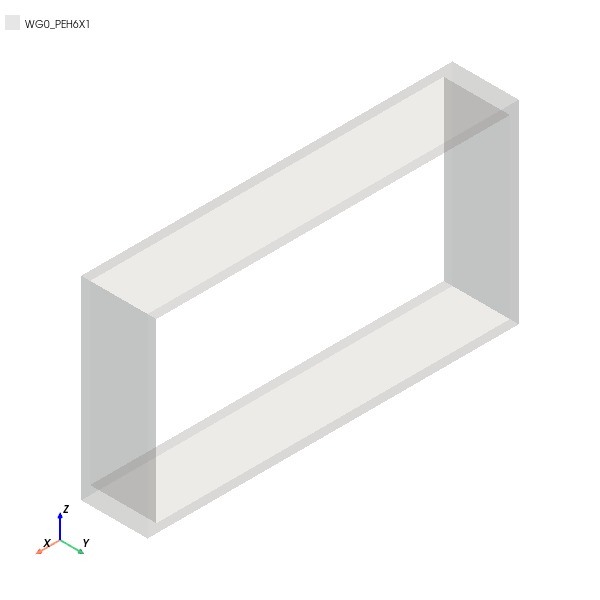

True

In [11]:
wg = toolkit.aedtapp.modeler.create_waveguide([0, 0, 0], 1)
model = toolkit.aedtapp.plot(show=False)
model.show_grid = False
model.plot(os.path.join(toolkit.aedtapp.working_directory, "Image.jpg"))

## Save and release AEDT

Save and release AEDT.

In [12]:
toolkit.release_aedt(True, True)

INFO - AEDT is released.


True